# Modeling One 

In [38]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.linear_model import LinearRegression, ElasticNetCV, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [19]:
df_2004 = pd.read_csv('./csv_files/df_2004')
df_2008 = pd.read_csv('./csv_files/df_2008')
df_2012 = pd.read_csv('./csv_files/df_2012')
df_2016 = pd.read_csv('./csv_files/df_2016')

In [20]:
df_2004.head()

,oct_rate,nov_rate,density,per_pov,med_income,total_vote_ratio,dem_vote_ratio,rep_vote_ratio,vote_diff,continuum_2003,influence_2003,per_less_high_2000,per_high_diploma_2000,per_some_college_2000,per_bachelors_or_higher_2000,per_less_high_change,per_high_dimploma_change,per_some_college_change,per_bachelors_change
0,7.8,8.3,0.019365,15.1,31362,0.374462,0.167296,0.207166,-0.039870,6,6,29.9,35.9,21.4,12.8,-11.2,2.5,6.7,2.0
1,5.3,5.3,0.011065,21.0,30040,0.422471,0.150904,0.271567,-0.120663,4,5,35.3,38.0,17.2,9.4,-10.1,4.5,4.6,1.0
2,4.0,4.6,0.012538,14.9,31256,0.364665,0.151942,0.212724,-0.060782,7,9,32.1,34.1,20.3,13.5,-8.4,0.6,3.5,4.3
3,3.9,3.9,0.003150,9.1,50754,0.454130,0.173859,0.280271,-0.106412,2,2,9.2,23.1,36.5,31.2,-3.6,-2.9,0.2,6.3
4,3.5,3.7,0.070994,9.7,41406,0.526998,0.228582,0.298416,-0.069834,8,7,12.2,48.4,28.2,11.2,-10.3,3.0,6.0,1.4


# Linear Modeling

In [21]:
# possible targets ['total_vote_ratio', 'dem_vote_ratio', 'rep_vote_ratio', 'vote_diff']
def linear_model(df, target):
    X = df.drop(['total_vote_ratio', 'dem_vote_ratio', 'rep_vote_ratio', 'vote_diff'], axis=1)
    y = df[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

    ss = StandardScaler()
    X_train = ss.fit_transform(X_train)
    X_test = ss.transform(X_test)
    
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    
    print('R^2', lm.score(X_test, y_test))
    
    predictions = lm.predict(X_test)
    
    print('mean squared error', np.sqrt(mean_squared_error(y_test, predictions)))
    
    if target == 'total_vote_ratio':
        color = 'rebeccapurple'
    elif target == 'dem_vote_ratio':
        color = 'cornflowerblue'
    elif target == 'rep_vote_ratio':
        color = 'firebrick'
    else:
        color = 'forestgreen'
    
    plt.scatter(y_test, predictions, alpha=.1, color=color)
    plt.title('Predictions versus Actual');
    plt.show()
    
    residuals = y_test - lm.predict(X_test)
    
    plt.scatter(y_test, residuals, alpha=.1, color=color)
    plt.title('Residuals');
    plt.show()
    
    plt.hist(residuals, bins=25, color=color)
    plt.title("Histogram of Residuals");
    
    columns = []
    for x in X.columns:
        columns.append(x + '[{}]' .format(target))
    
    feature_importance = pd.DataFrame()
    feature_importance['feature_name'] = columns
    feature_importance['coefficients'] = lm.coef_

    
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 10)
    plt.xlim(-0.6, 0.6)

    people = feature_importance['feature_name']
    y_pos = np.arange(len(people))
    performance = feature_importance['coefficients']


    ax.barh(y_pos, performance, align='center', color=color)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(people)
    ax.invert_yaxis() 
    plt.show()

# 2004

R^2 0.521837485354
mean squared error 0.0554586520087


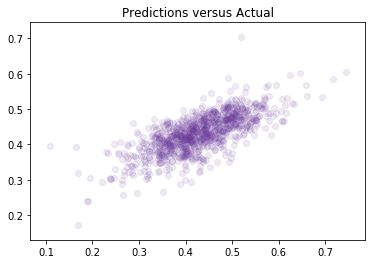

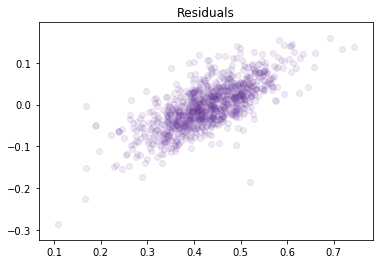

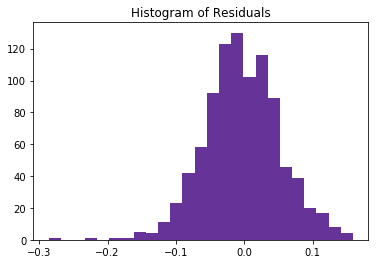

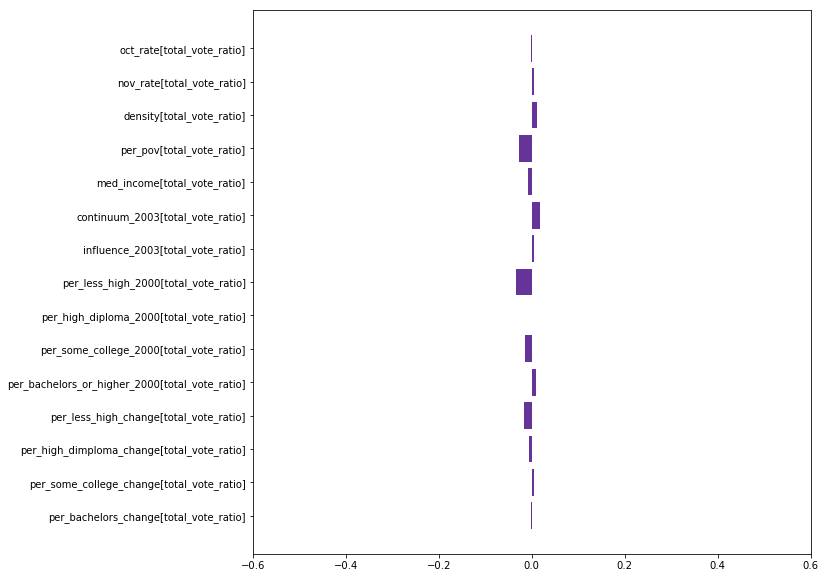

In [22]:
linear_model(df_2004, 'total_vote_ratio')

R^2 0.245327397713
mean squared error 0.0562970607309


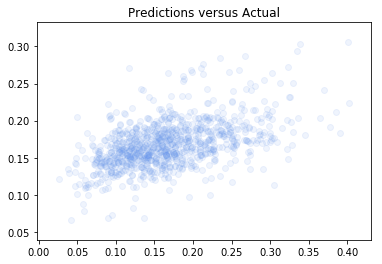

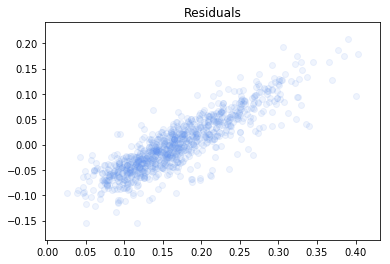

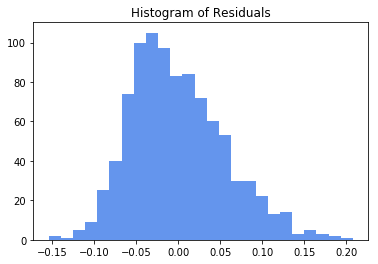

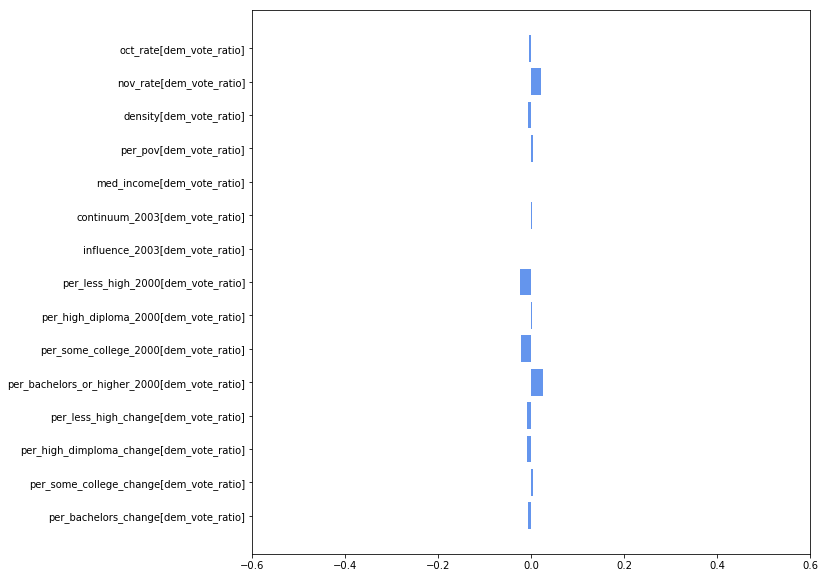

In [23]:
linear_model(df_2004, 'dem_vote_ratio')

R^2 0.560321120784
mean squared error 0.0497455714277


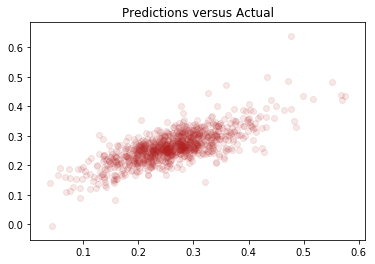

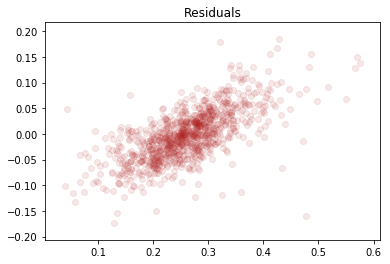

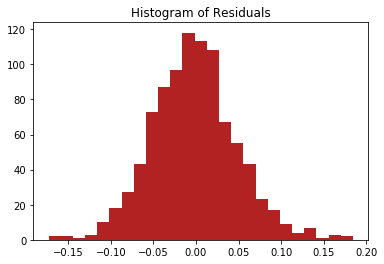

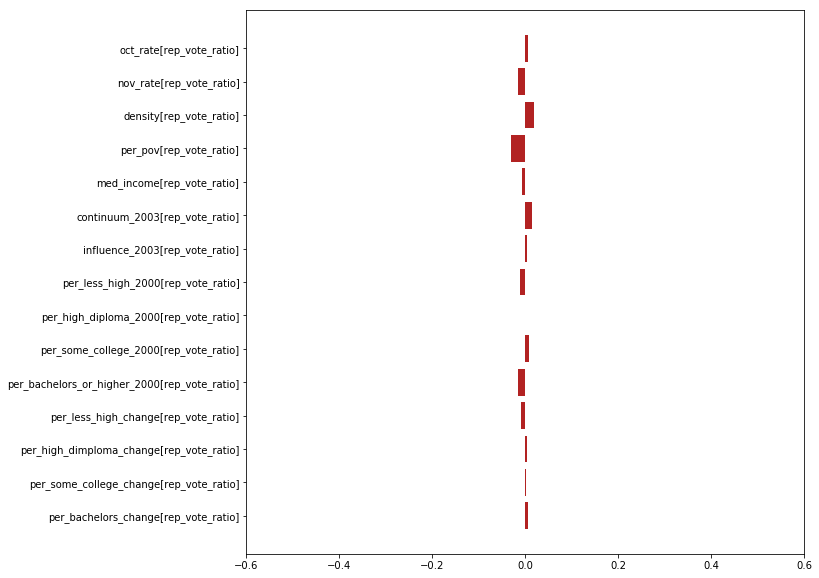

In [24]:
linear_model(df_2004, 'rep_vote_ratio')

R^2 0.378963557361
mean squared error 0.0906217400219


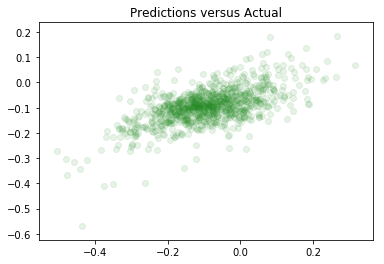

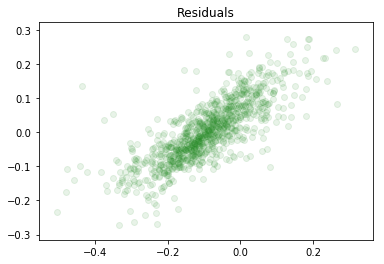

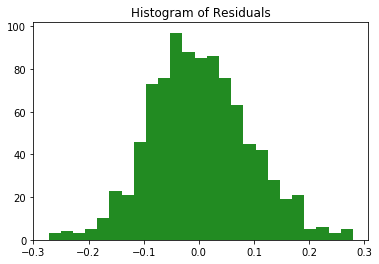

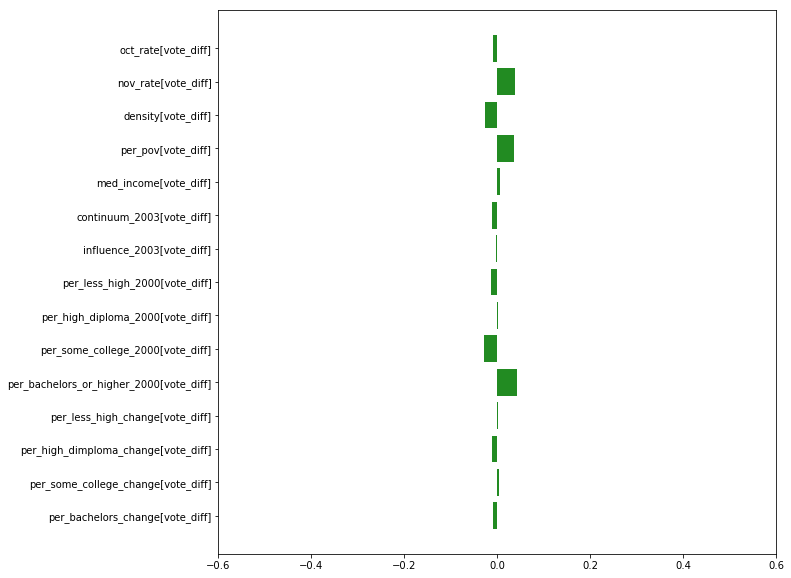

In [25]:
linear_model(df_2004, 'vote_diff')

# 2008

R^2 0.498994335857
mean squared error 0.0563080012867


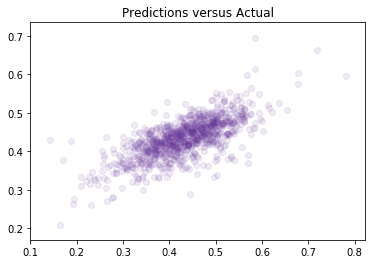

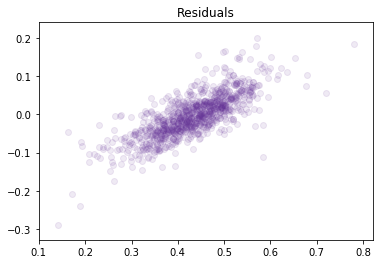

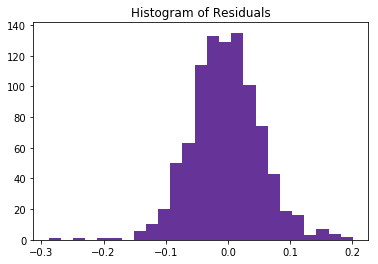

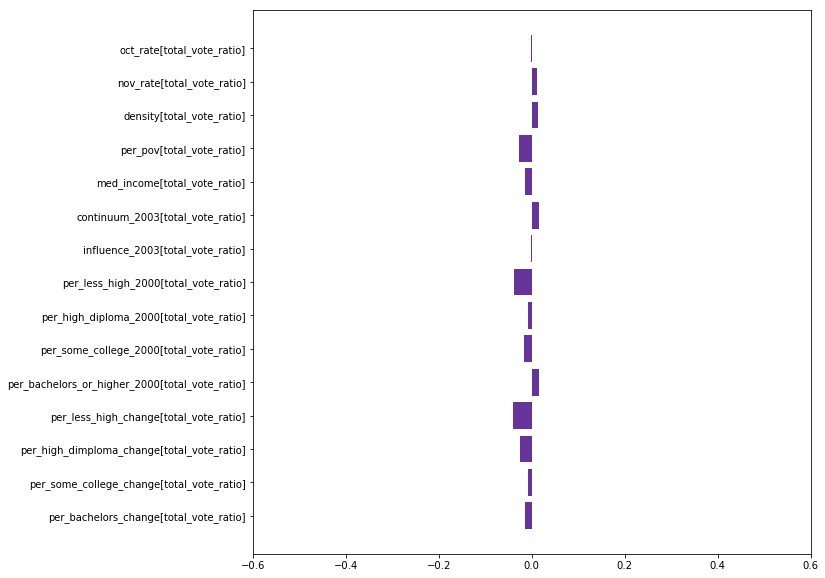

In [26]:
linear_model(df_2008, 'total_vote_ratio')

R^2 0.315225212409
mean squared error 0.0614572031667


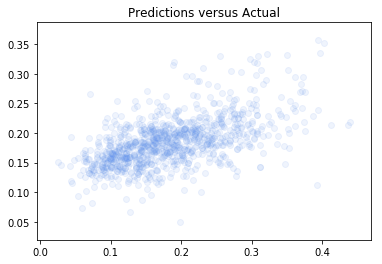

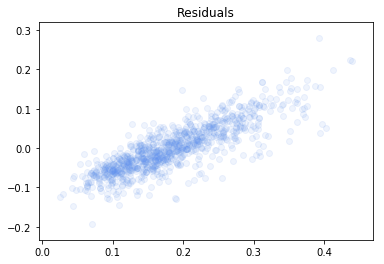

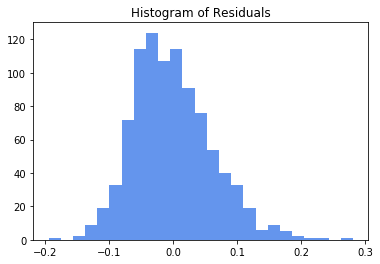

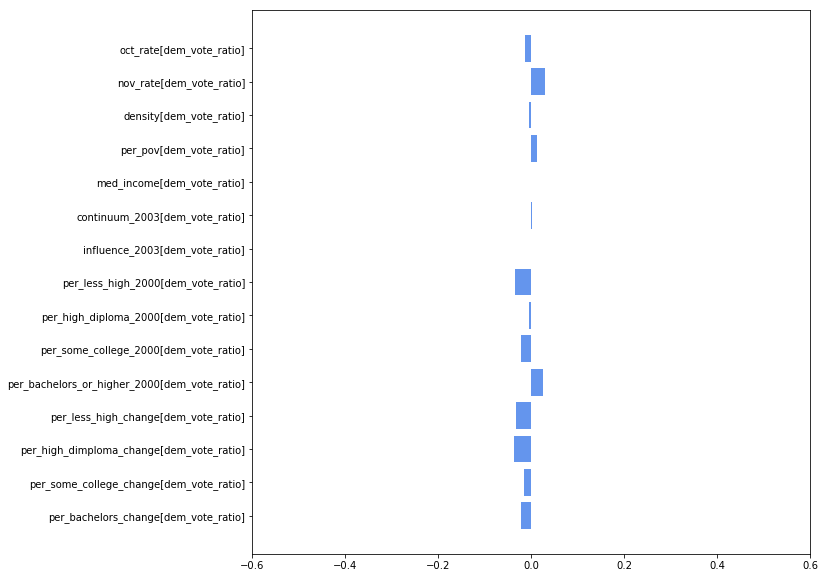

In [27]:
linear_model(df_2008, 'dem_vote_ratio')

R^2 0.475454042076
mean squared error 0.0520534335405


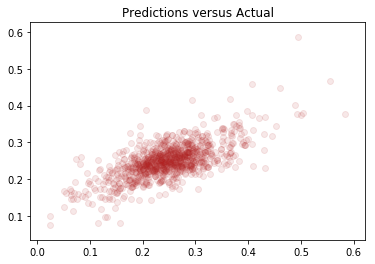

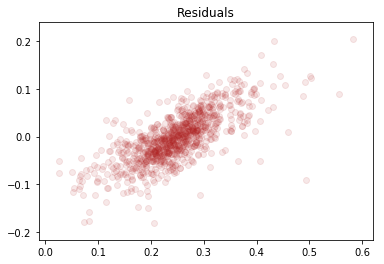

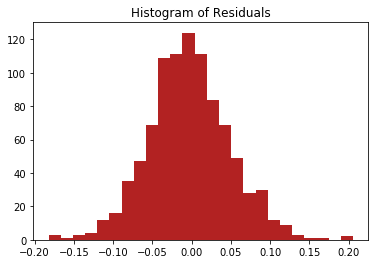

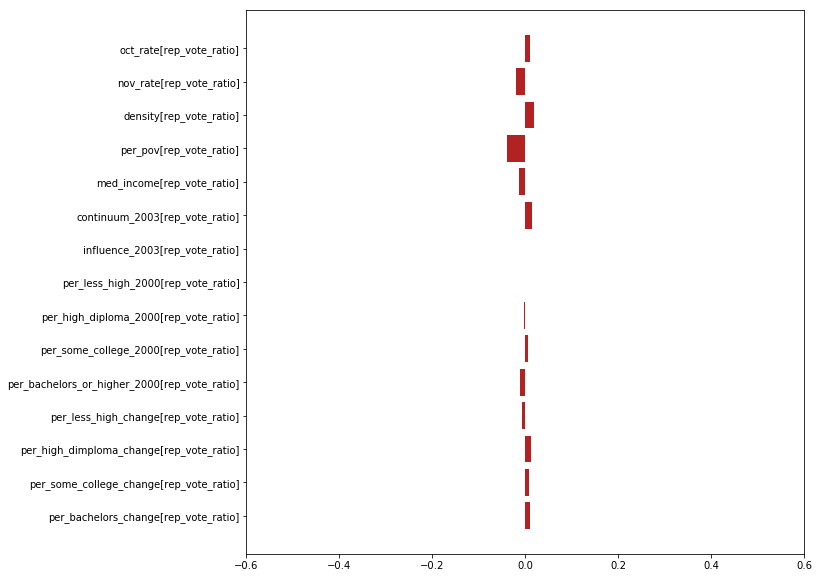

In [28]:
linear_model(df_2008, 'rep_vote_ratio')

R^2 0.347975142079
mean squared error 0.0990075982941


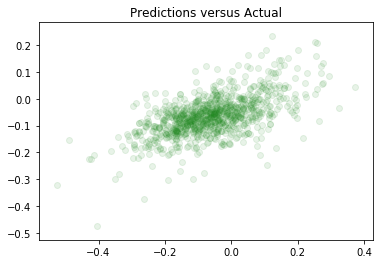

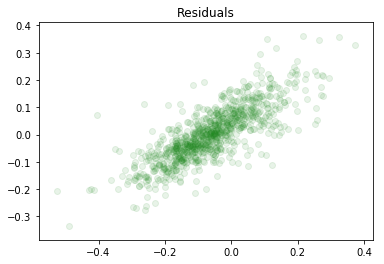

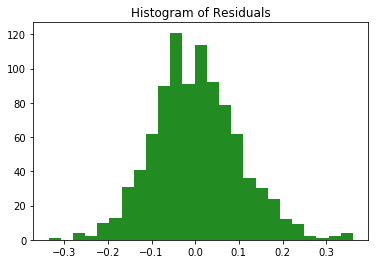

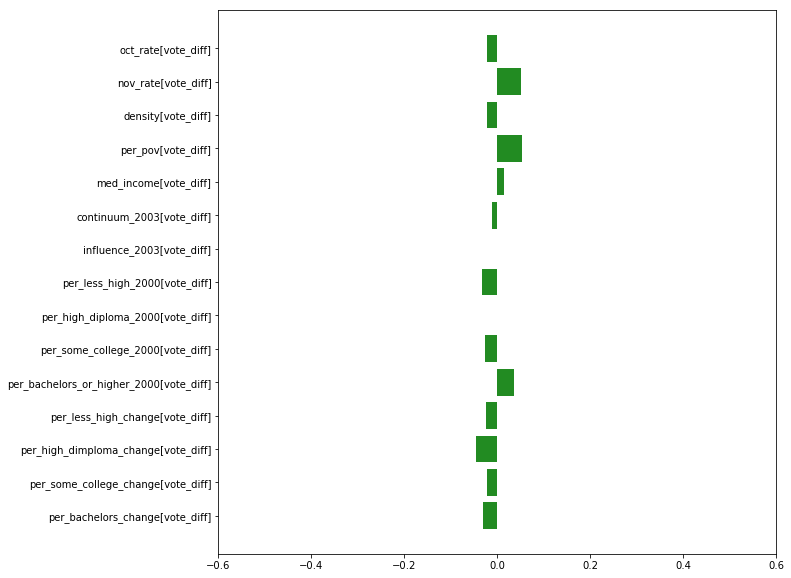

In [29]:
linear_model(df_2008, 'vote_diff')

# 2012

R^2 0.418150081375
mean squared error 0.064506003354


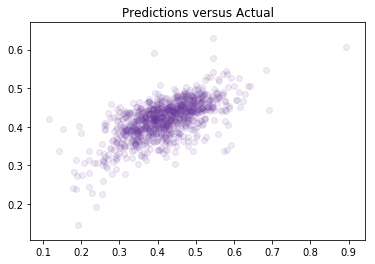

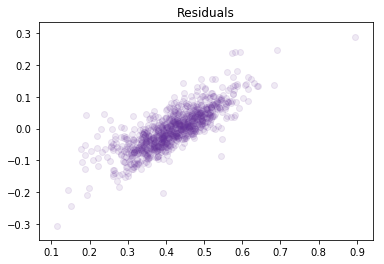

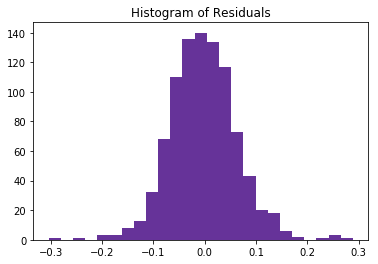

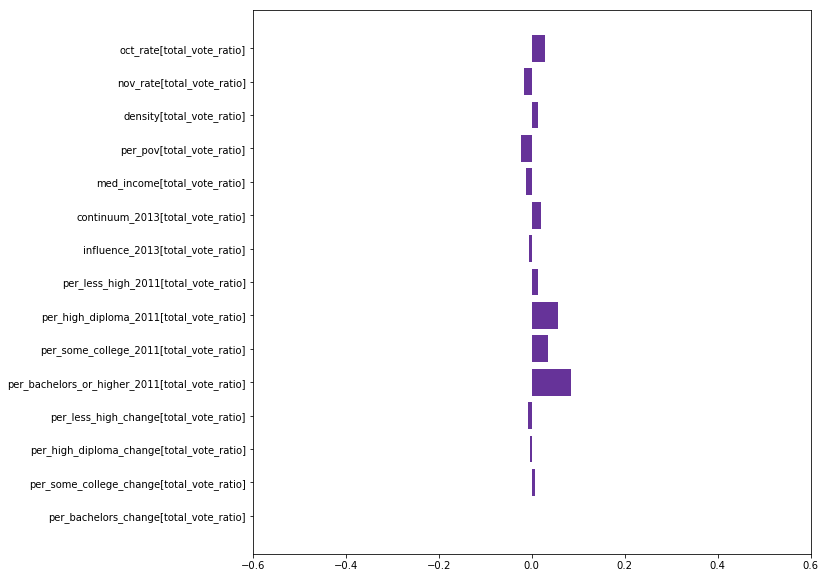

In [30]:
linear_model(df_2012, 'total_vote_ratio')

R^2 0.273589892641
mean squared error 0.0653423976474


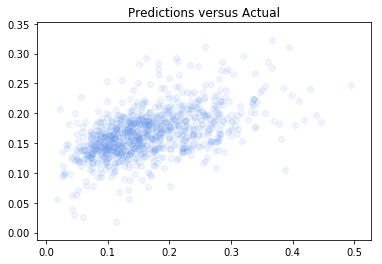

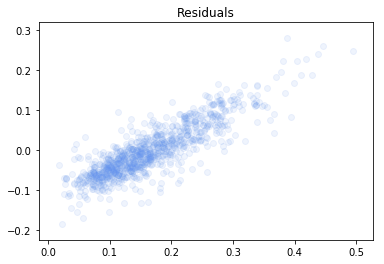

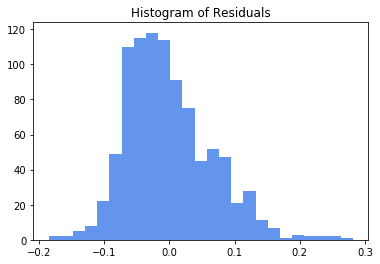

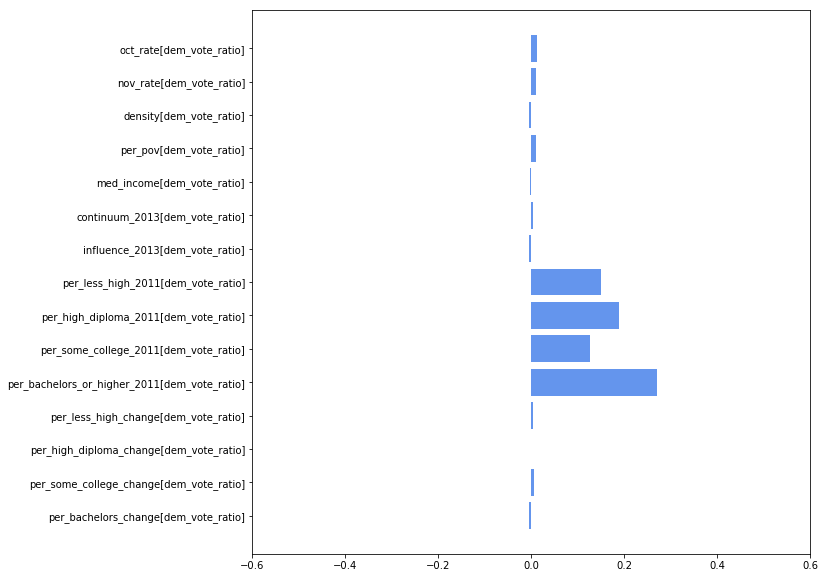

In [31]:
linear_model(df_2012, 'dem_vote_ratio')

R^2 0.48511719465
mean squared error 0.0554562288885


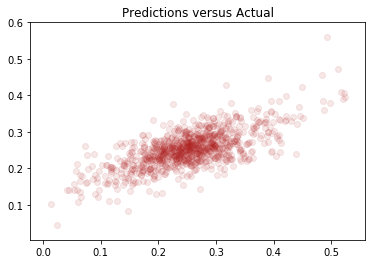

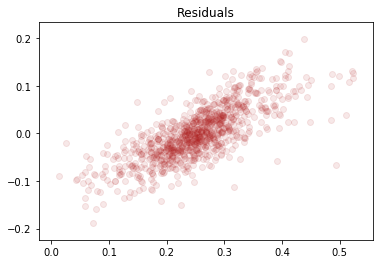

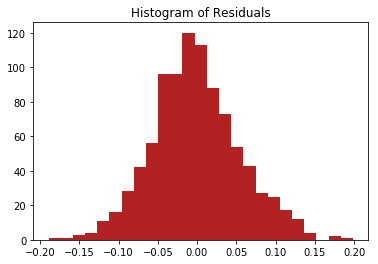

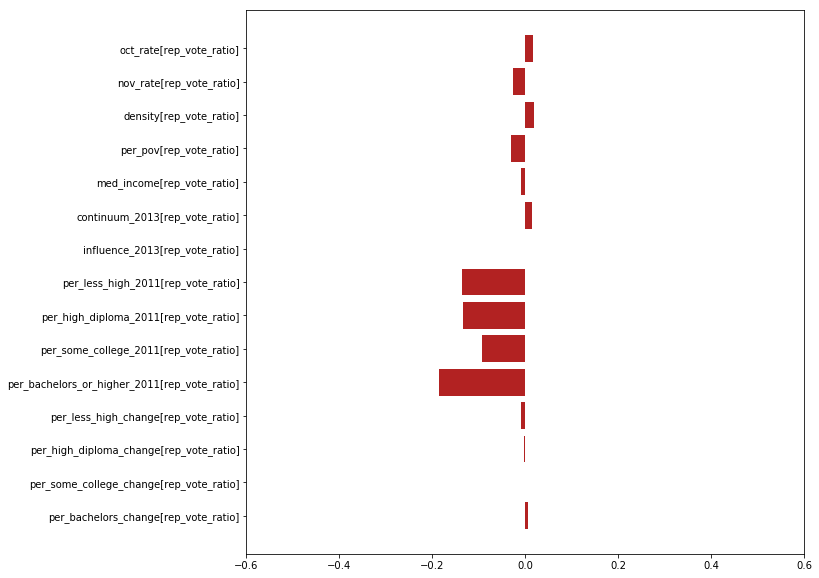

In [32]:
linear_model(df_2012, 'rep_vote_ratio')

R^2 0.363807183968
mean squared error 0.102611013234


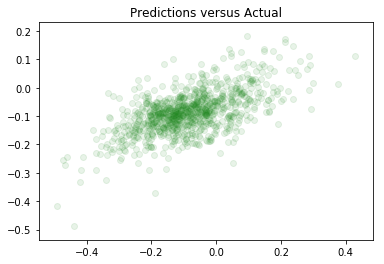

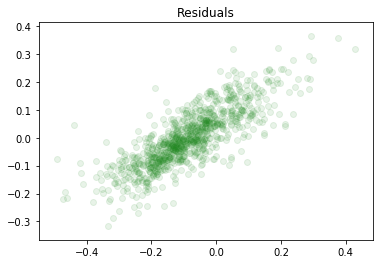

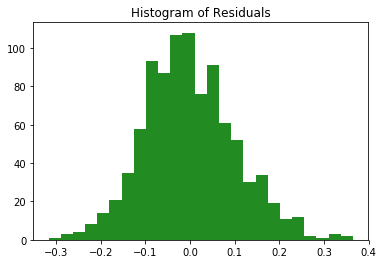

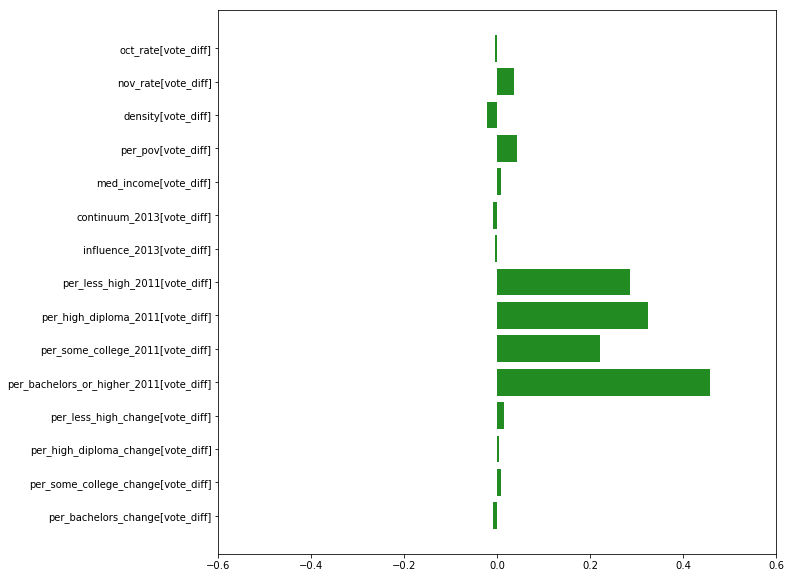

In [33]:
linear_model(df_2012, 'vote_diff')

# 2016

R^2 0.411979981986
mean squared error 0.0610019367211


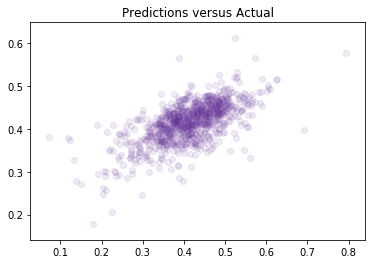

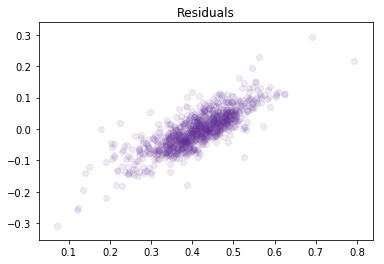

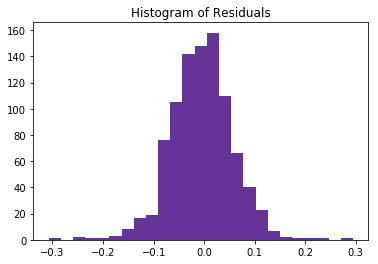

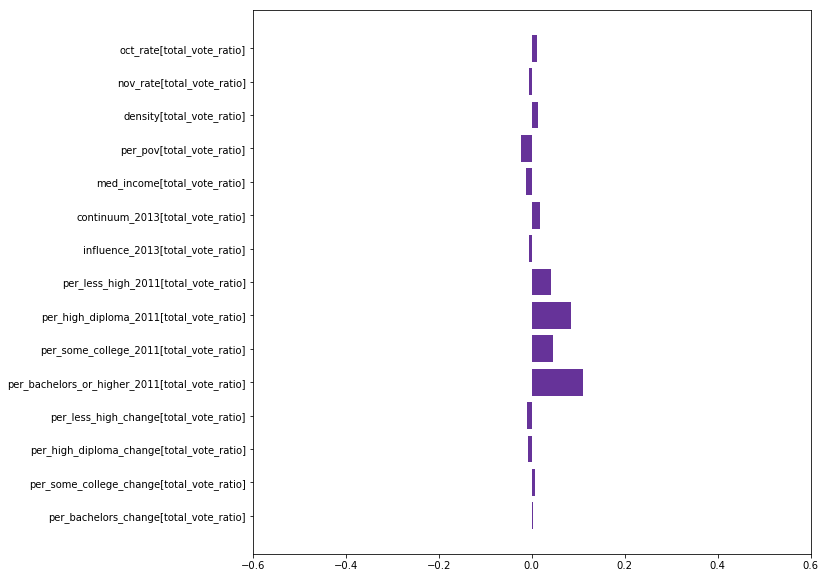

In [34]:
linear_model(df_2016, 'total_vote_ratio')

R^2 0.400547028068
mean squared error 0.0553044996053


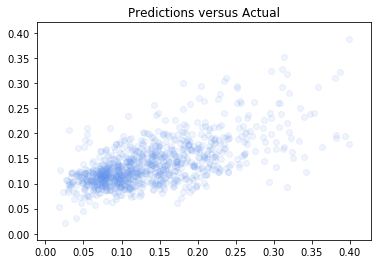

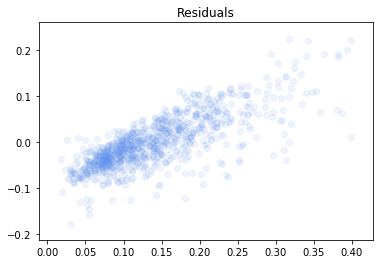

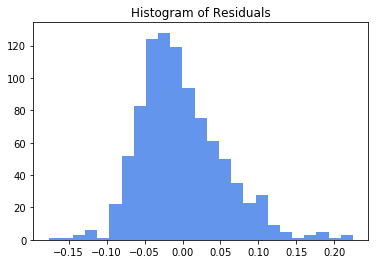

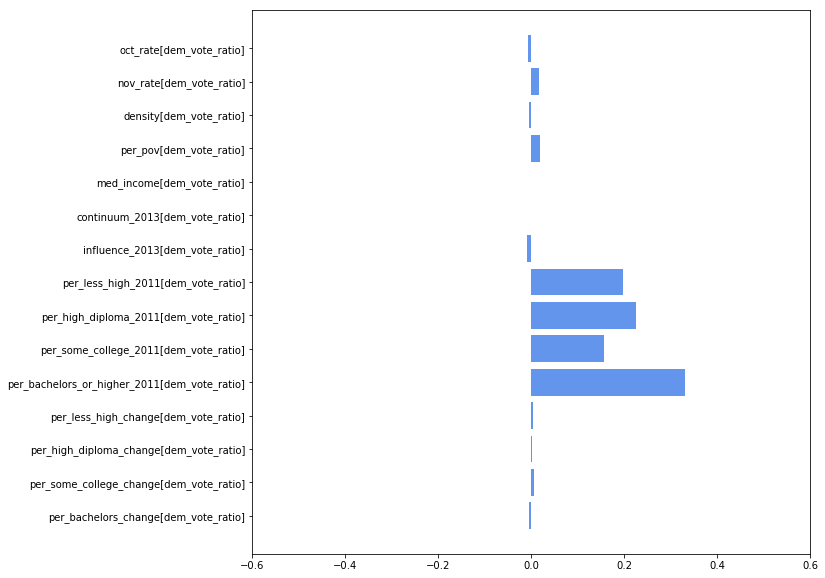

In [35]:
linear_model(df_2016, 'dem_vote_ratio')

R^2 0.564445172807
mean squared error 0.0564279764372


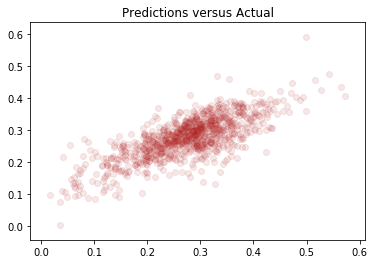

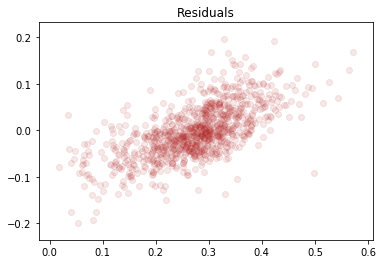

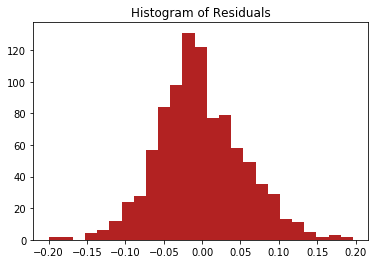

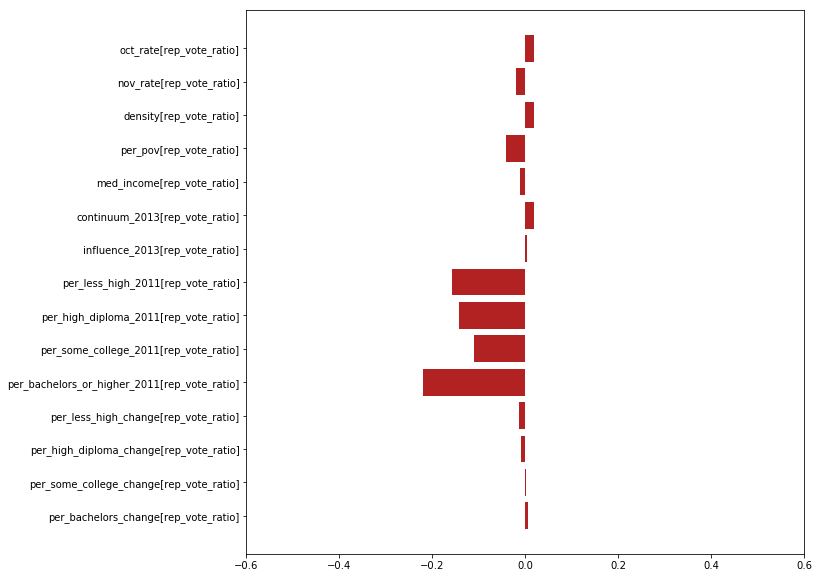

In [36]:
linear_model(df_2016, 'rep_vote_ratio')

R^2 0.526187869091
mean squared error 0.0936171571831


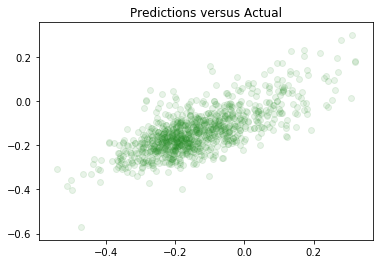

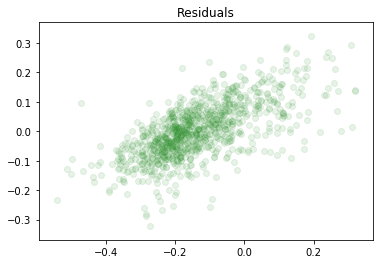

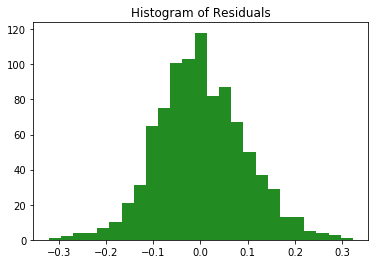

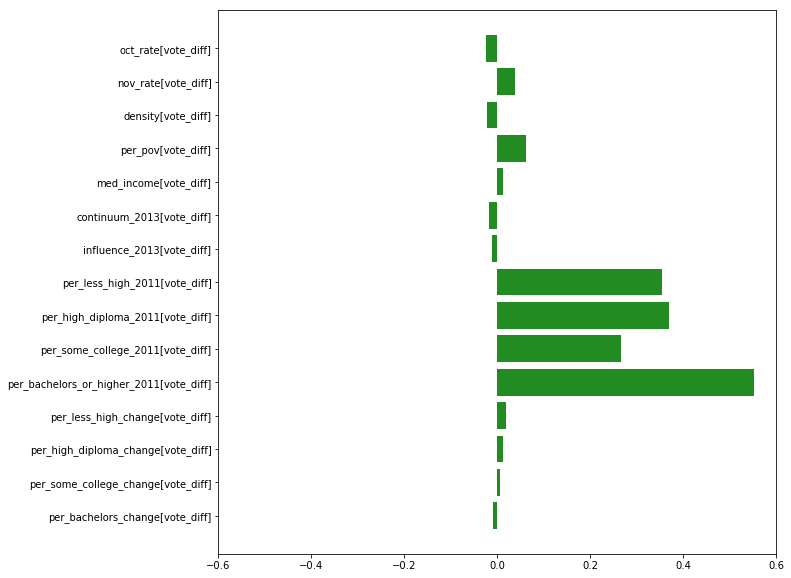

In [37]:
linear_model(df_2016, 'vote_diff')

# Gradient Boost

In [52]:
# possible targets ['total_vote_ratio', 'dem_vote_ratio', 'rep_vote_ratio', 'vote_diff']
def grad_model(df, target):
    X = df.drop(['total_vote_ratio', 'dem_vote_ratio', 'rep_vote_ratio', 'vote_diff'], axis=1)
    y = df[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

    ss = StandardScaler()
    X_train = ss.fit_transform(X_train)
    X_test = ss.transform(X_test)
    
    grad = GradientBoostingRegressor()
    grad.fit(X_train, y_train)
    
    print('R^2', grad.score(X_test, y_test))
    
    predictions = grad.predict(X_test)
    
    print('mean squared error', np.sqrt(mean_squared_error(y_test, predictions)))
    
    if target == 'total_vote_ratio':
        color = 'rebeccapurple'
    elif target == 'dem_vote_ratio':
        color = 'cornflowerblue'
    elif target == 'rep_vote_ratio':
        color = 'firebrick'
    else:
        color = 'forestgreen'
    
    plt.scatter(y_test, predictions, alpha=.1, color=color)
    plt.title('Predictions versus Actual');
    plt.show()
    
    residuals = y_test.mean() - grad.predict(X_test)
    
    plt.scatter(y_test, residuals, alpha=.1, color=color)
    plt.title('Residuals');
    plt.show()
    
    plt.hist(residuals, bins=25, color=color)
    plt.title("Histogram of Residuals");
    
    
    feature_importance = pd.DataFrame()
    feature_importance['feature_name'] = X.columns
    feature_importance['coefficients'] = grad.feature_importances_ 

    
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 10)

    feat = feature_importance['feature_name']
    y_pos = np.arange(len(feat))
    coeff = feature_importance['coefficients']

    ax.barh(y_pos, coeff, align='center', color=color)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(feat)
    ax.invert_yaxis() 
    plt.title('Feature Importance')
    plt.show()

# 2004

R^2 0.594399361551
mean squared error 0.0510776444749


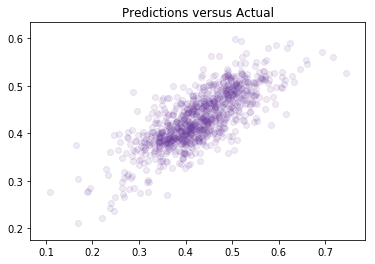

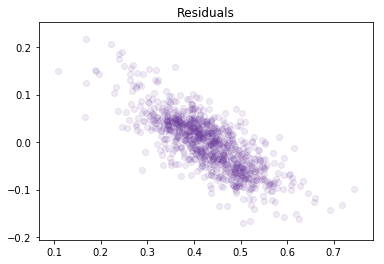

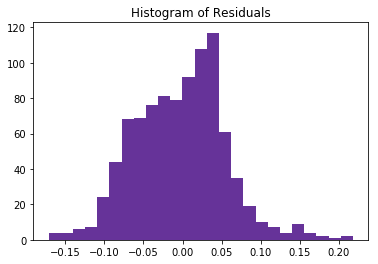

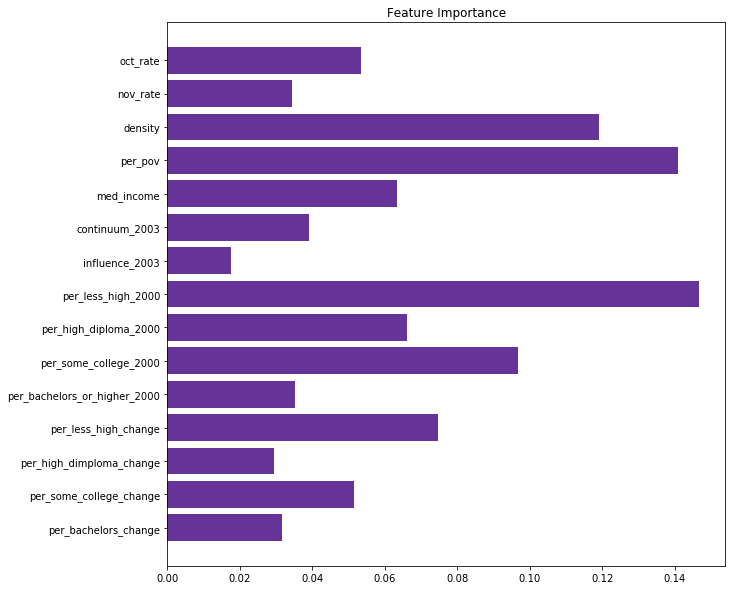

In [53]:
grad_model(df_2004, 'total_vote_ratio')

R^2 0.364169047487
mean squared error 0.0516746164729


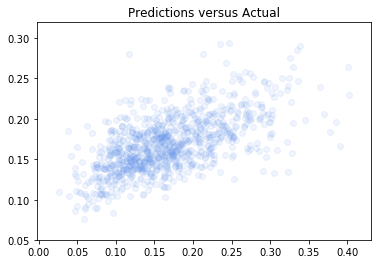

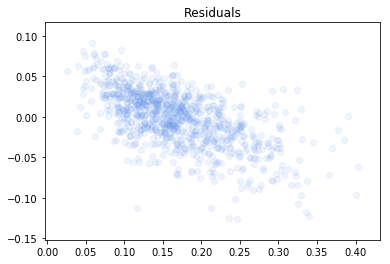

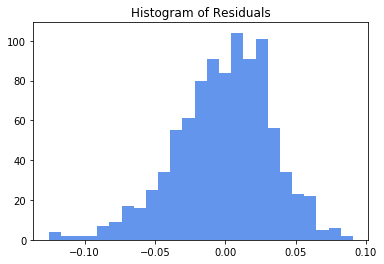

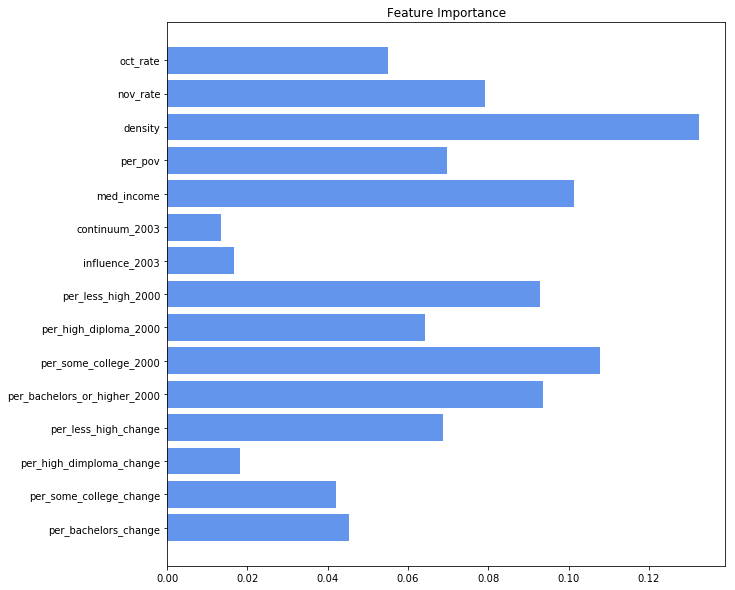

In [54]:
grad_model(df_2004, 'dem_vote_ratio')

R^2 0.628826624615
mean squared error 0.0457061909978


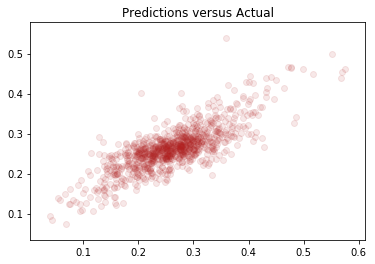

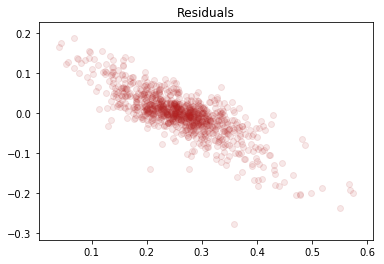

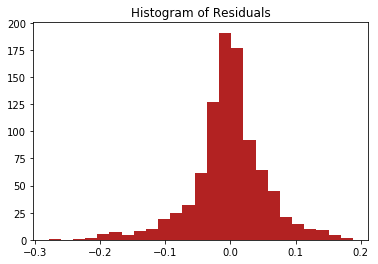

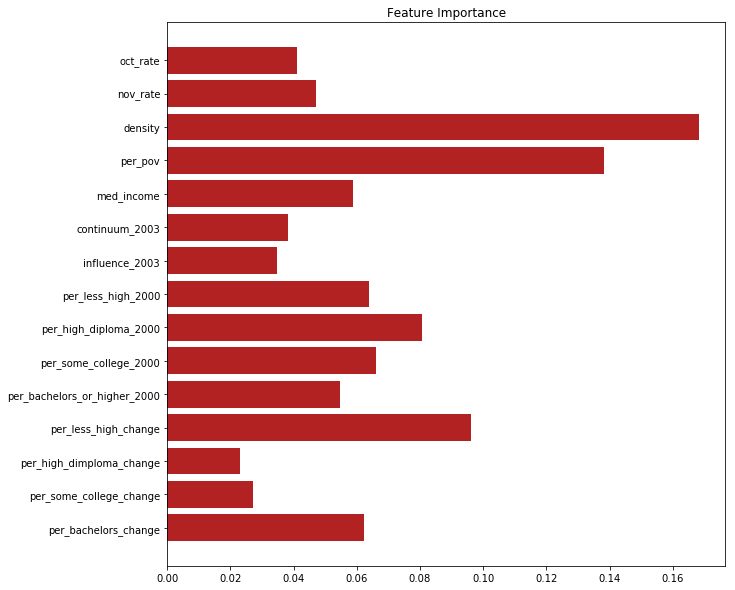

In [55]:
grad_model(df_2004, 'rep_vote_ratio')

R^2 0.478494560185
mean squared error 0.0830430469325


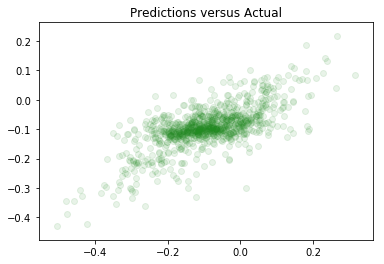

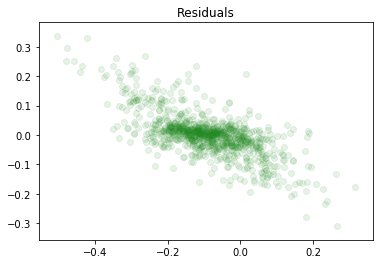

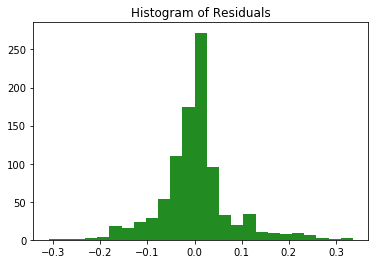

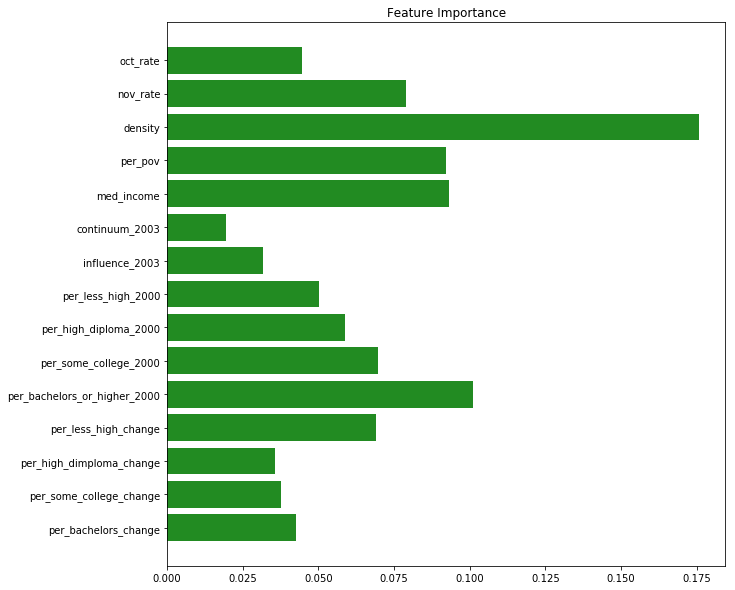

In [56]:
grad_model(df_2004, 'vote_diff')

# 2008

R^2 0.567041217773
mean squared error 0.0523446223245


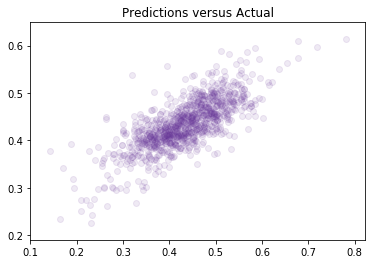

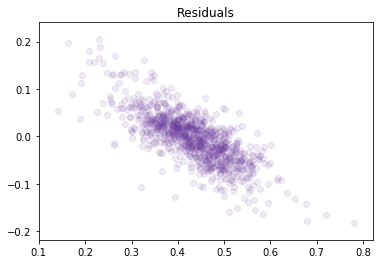

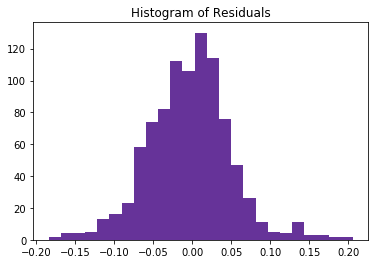

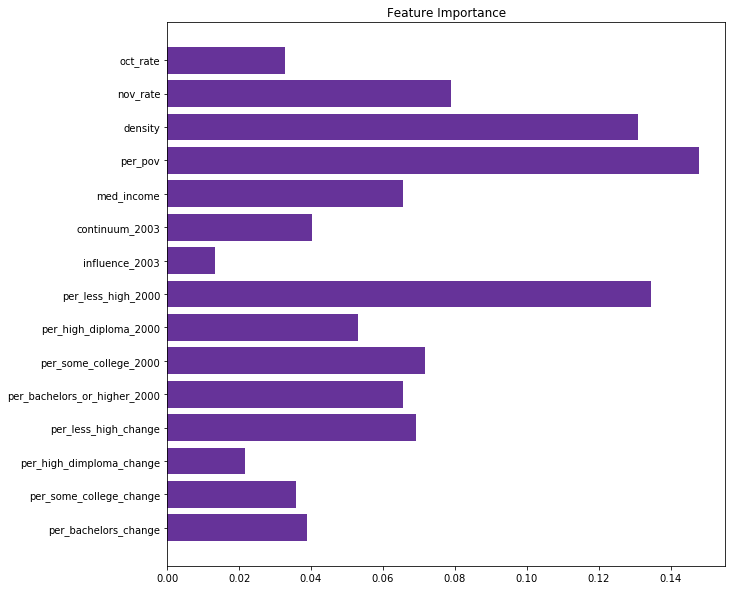

In [57]:
grad_model(df_2008, 'total_vote_ratio')

R^2 0.430935626646
mean squared error 0.0560247090571


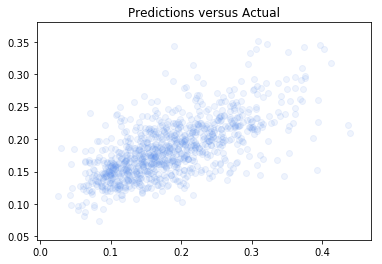

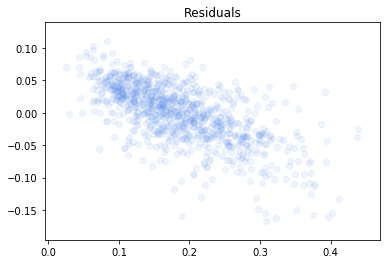

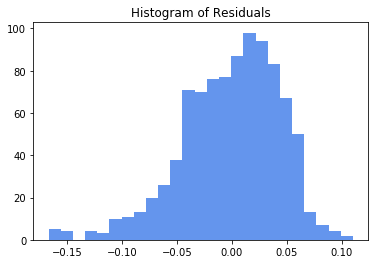

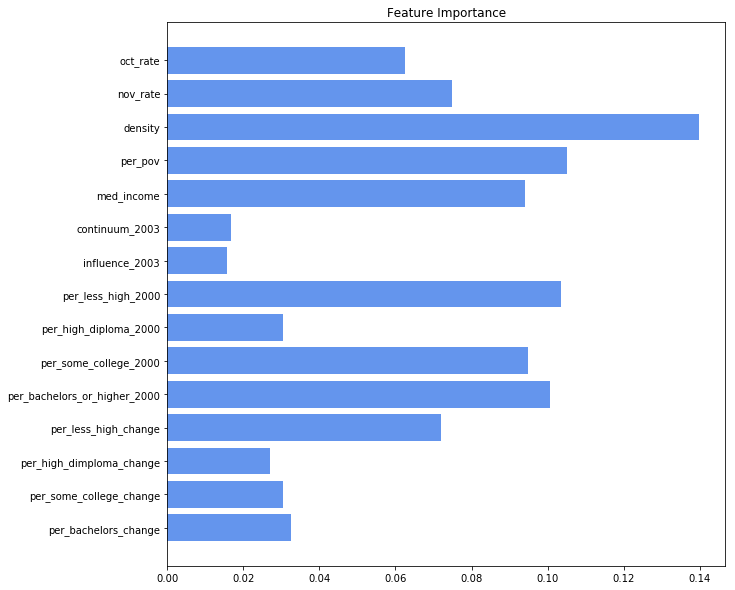

In [58]:
grad_model(df_2008, 'dem_vote_ratio')

R^2 0.551785152355
mean squared error 0.0481172422663


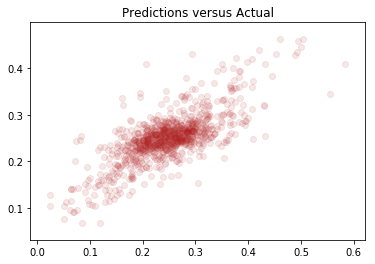

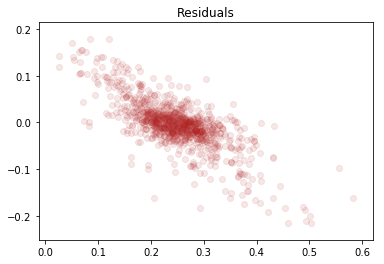

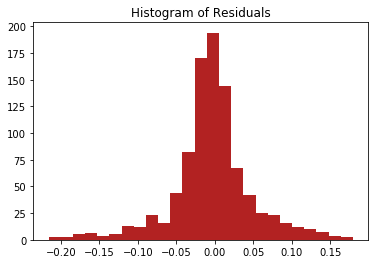

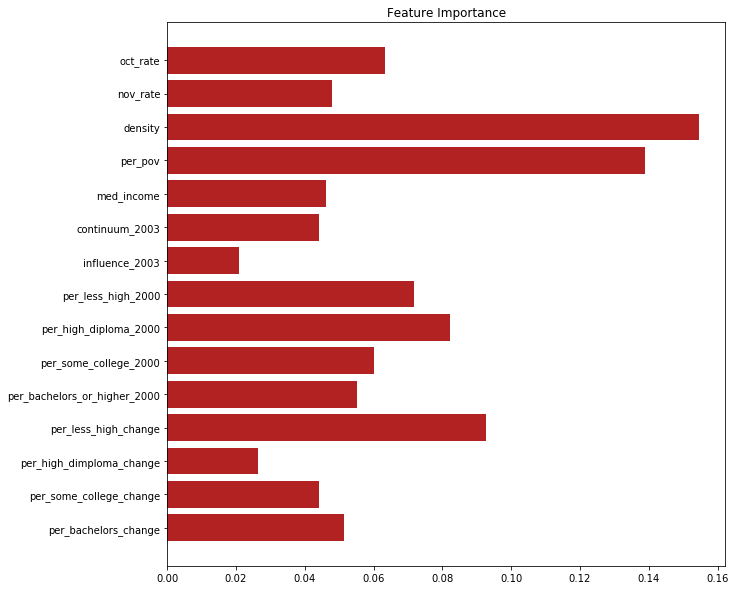

In [59]:
grad_model(df_2008, 'rep_vote_ratio')

R^2 0.446138881523
mean squared error 0.0912508436169


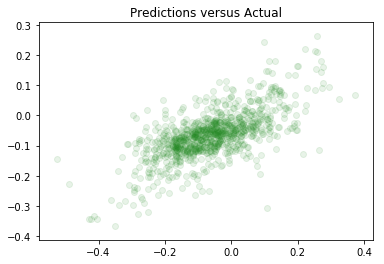

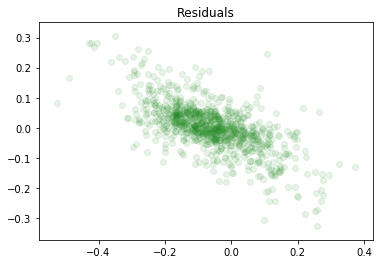

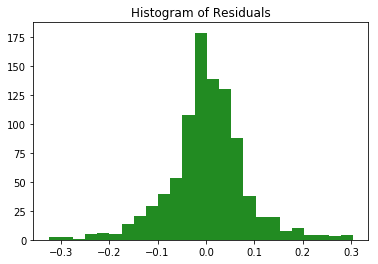

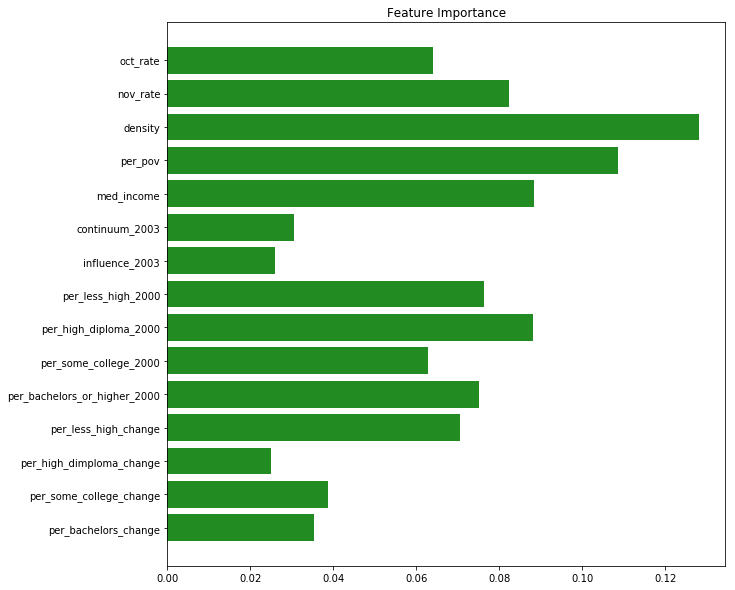

In [60]:
grad_model(df_2008, 'vote_diff')

# 2012

R^2 0.535908404567
mean squared error 0.0576098172602


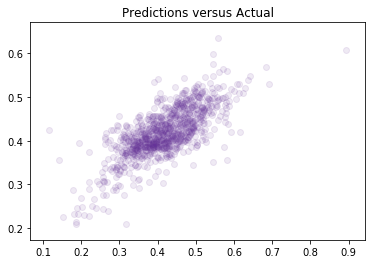

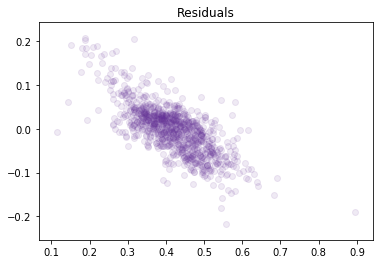

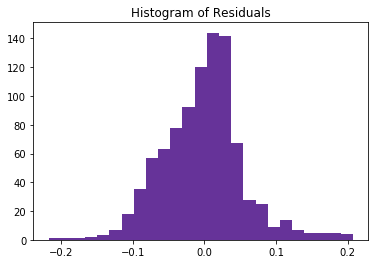

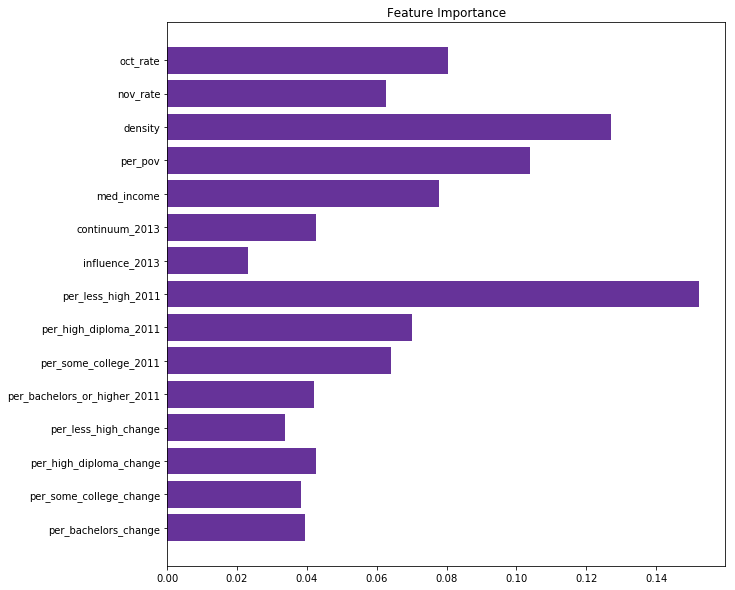

In [61]:
grad_model(df_2012, 'total_vote_ratio')

R^2 0.405706838036
mean squared error 0.059102315194


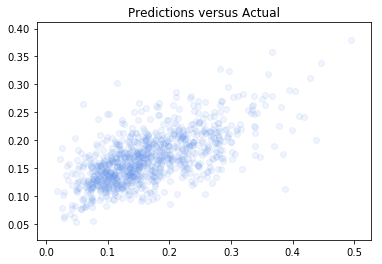

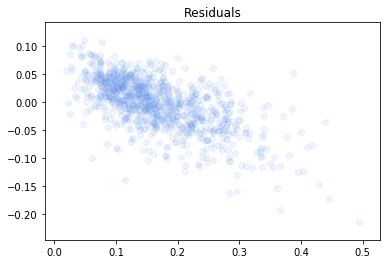

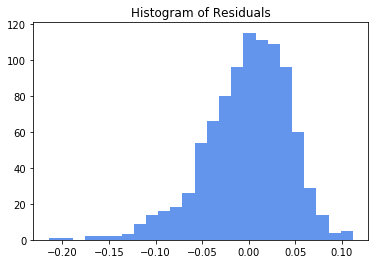

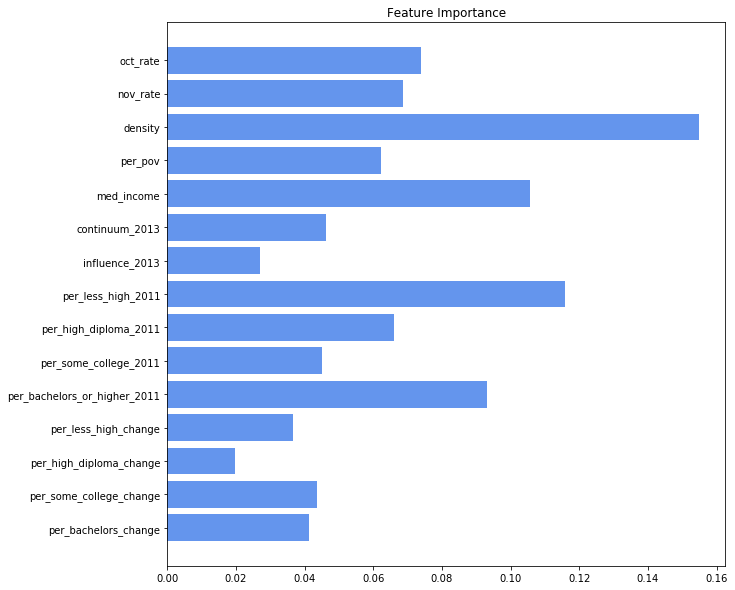

In [62]:
grad_model(df_2012, 'dem_vote_ratio')

R^2 0.586888591536
mean squared error 0.0496740686856


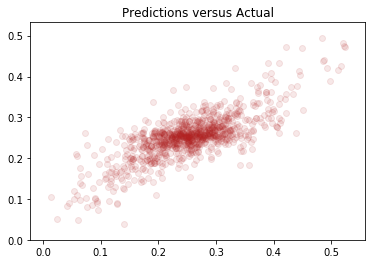

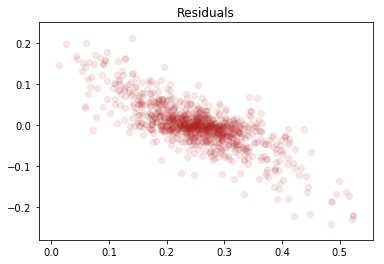

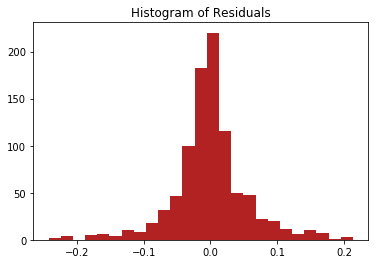

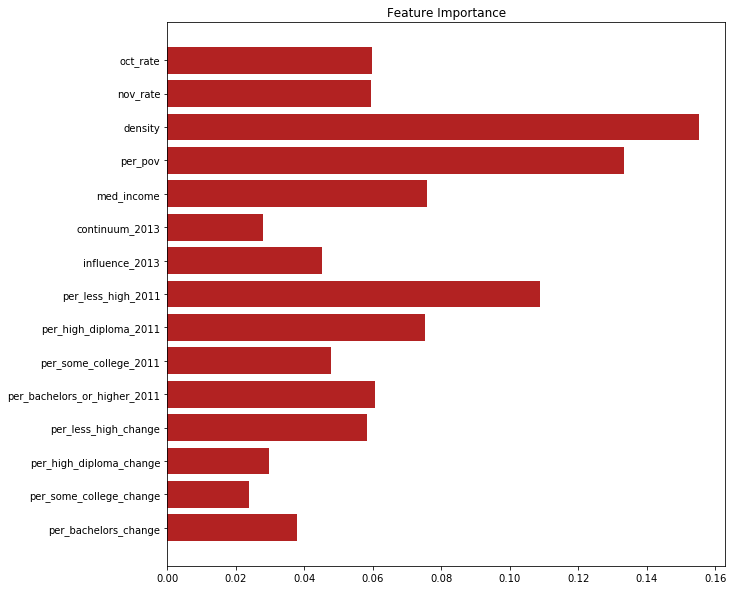

In [63]:
grad_model(df_2012, 'rep_vote_ratio')

R^2 0.469291699977
mean squared error 0.0937189762001


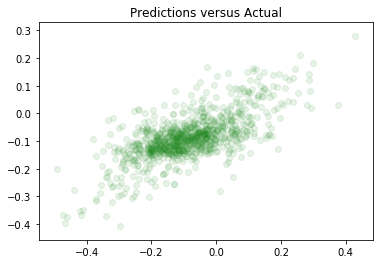

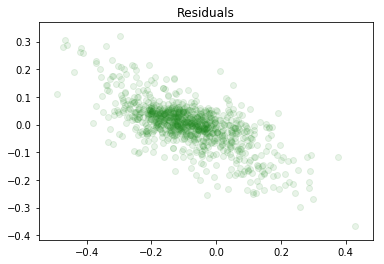

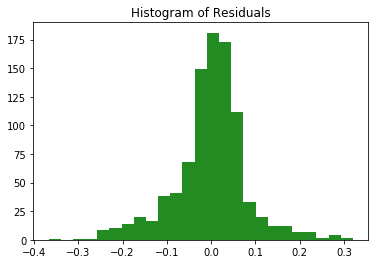

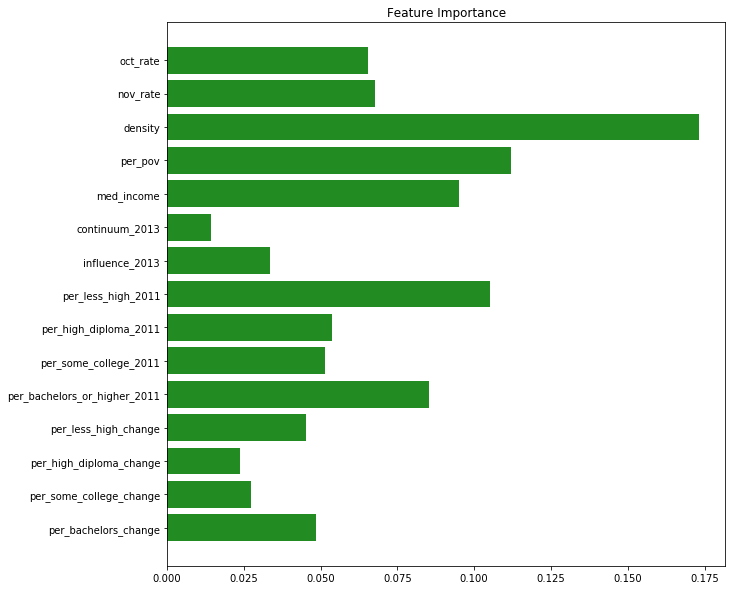

In [64]:
grad_model(df_2012, 'vote_diff')

# 2016

R^2 0.496184922696
mean squared error 0.0564654960786


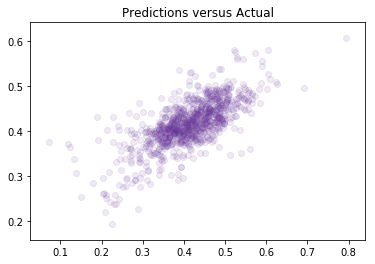

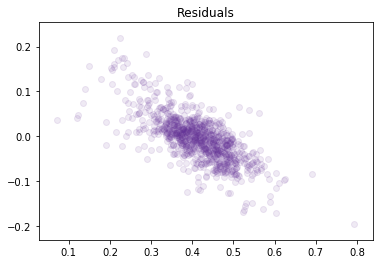

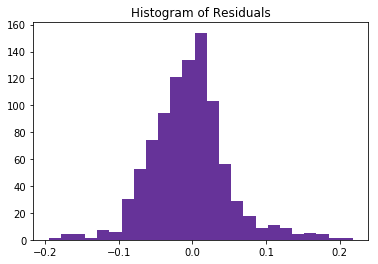

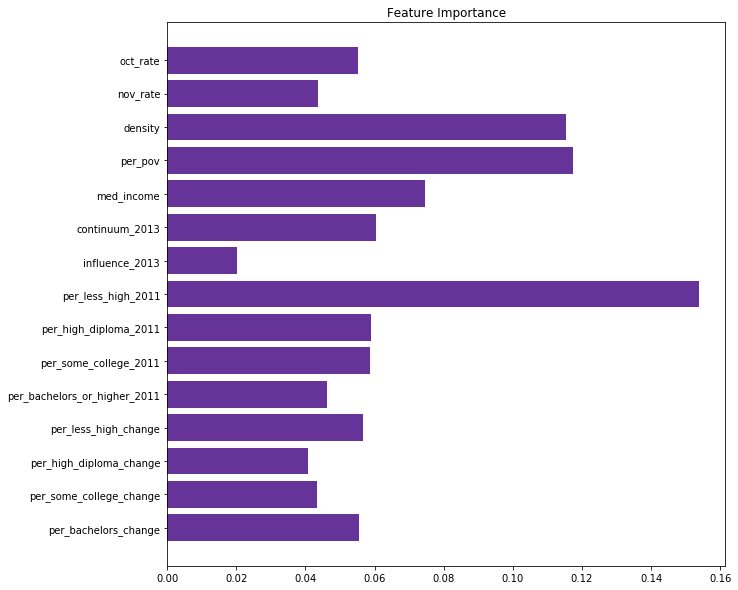

In [65]:
grad_model(df_2016, 'total_vote_ratio')

R^2 0.479733656479
mean squared error 0.0515223631435


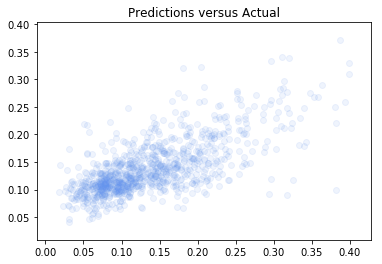

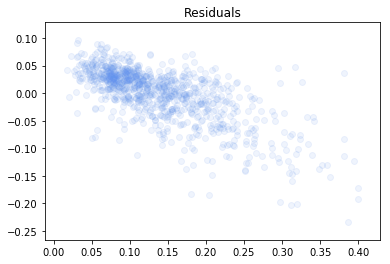

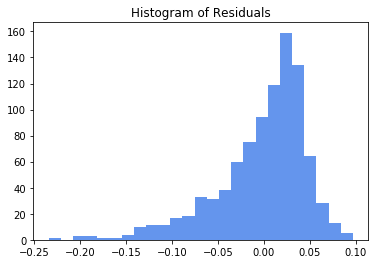

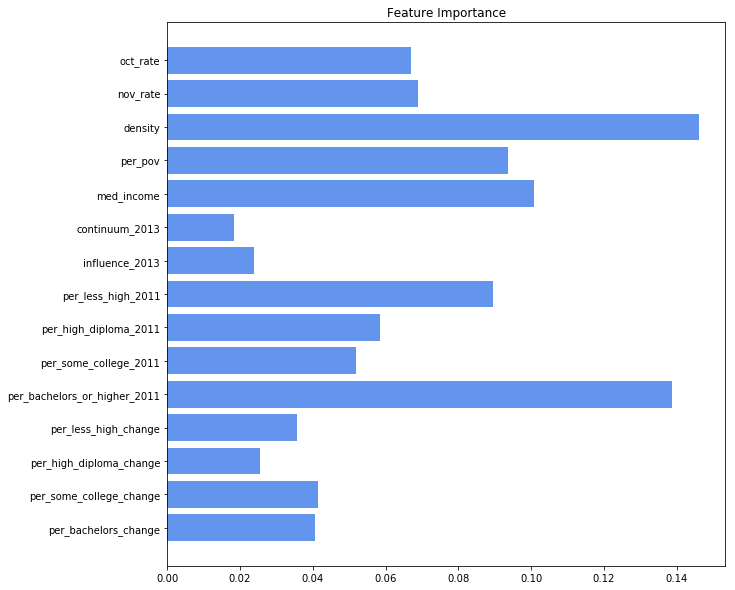

In [66]:
grad_model(df_2016, 'dem_vote_ratio')

R^2 0.642017328508
mean squared error 0.0511568815924


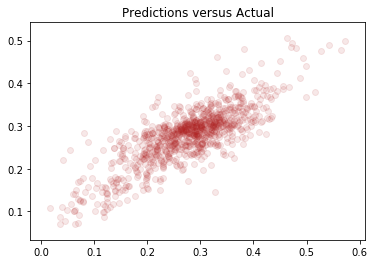

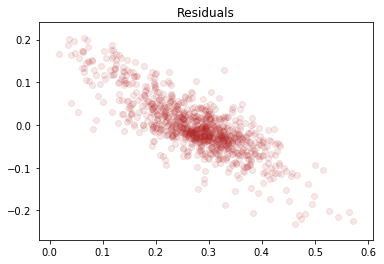

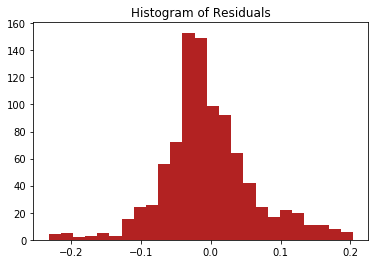

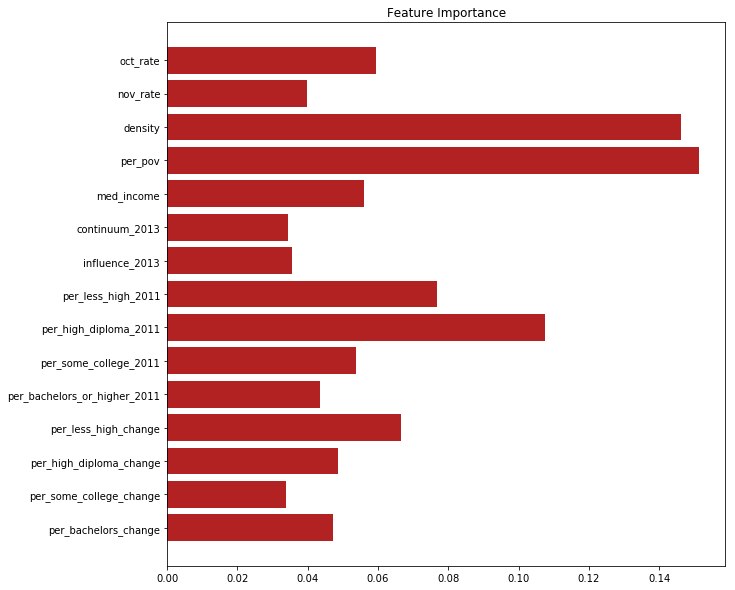

In [67]:
grad_model(df_2016, 'rep_vote_ratio')

R^2 0.591113953848
mean squared error 0.0869668031837


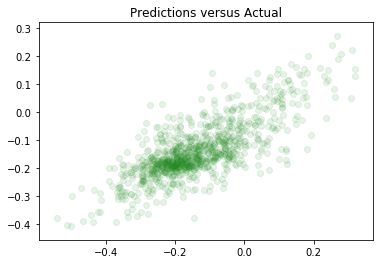

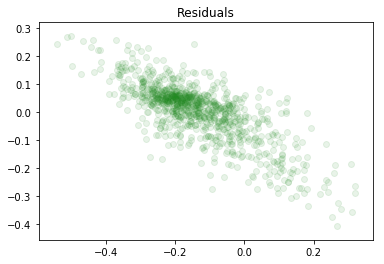

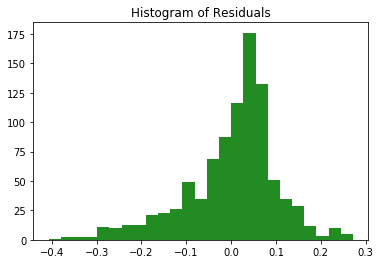

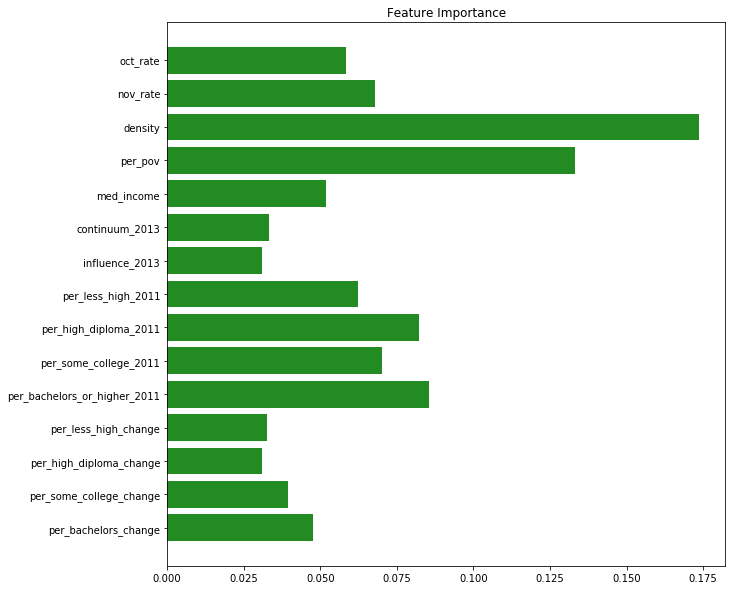

In [68]:
grad_model(df_2016, 'vote_diff')